# Grid velocity statistics by binning

By modifying Natascha's code, I have tried to compute the relative velocity statistics on grid. After some running, I think I finally have results. Here I will try to compare them with that computed on particles and see if we can validate the correctness or find some bugs in the code I am using.

Several important obervations:
1. Don't really need $256^3$ grid points to get nice enough results (Around $256^2$ is fair enough; and it runs for 30 mins instead of 5 days)
2. The two statistics agreed using exact $v_p$ and $\rho_p$, indicating the correctness of the method

In [191]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [192]:
def json_read(path):
    f = open(path,'r')
    return list2npy(json.load(f))

In [204]:
def list2npy(dictionary):
    for key, val in dictionary.items():
        if type(val) is list:
            dictionary[key] = np.array(dictionary[key])
    return dictionary

In [194]:
def plot_rdf(stats,mode='grid'):
    binEdges = np.array(stats['binEdges'])
    binCenters = np.array(stats['binCenters'])
    dr = binEdges[1:]-binEdges[:-1]

    if mode == 'part':
        partCounts = np.array(stats['partCounts'])
        n_bar = np.sum(partCounts)/((4/3)*np.pi*binEdges[-1]**3)
        rdf = partCounts/(4*np.pi*binCenters**2*dr)/n_bar
    elif mode == 'grid':
        rdf = stats['rdf']
    plt.loglog(binCenters,rdf/0.1)
        

In [195]:
def plot_rel_vel(stats,mode='grid'):
    binCenters = stats['binCenters']
    if mode == 'part':
        avgRelVel = stats['velocitySum']/stats['partCounts']
    elif mode == 'grid':
        avgRelVel = stats['velc_sum']
    plt.loglog(binCenters,avgRelVel,label=mode)

In [196]:
def plot_rad_vel(stats,mode='grid'):
    binCenters = stats['binCenters']
    if mode == 'part':
        avgRelVel = stats['velocityRadialSum']/stats['partCounts']
    elif mode == 'grid':
        avgRelVel = stats['velc_rad_sum']
    plt.loglog(binCenters,avgRelVel,label=mode)

In [198]:
particleStats = json_read('./json/RDFVelocityTest-particle.json')
gridStats256 = json_read('./json/RDFVelocityTest-1642308104.json')
gridStats256_2 = json_read('./json/RDFVelocityTest-1642310281.json')
gridStats256_3 = json_read('./json/RDFVelocityTest-5days.json')
gridStatsNoNan = json_read('./json/RDFVelocityTest-1642692709.json')

In [199]:
gridStatsNoNan.keys(),particleStats.keys()

(dict_keys(['rhop-path', 'vp-path', 'binEdges', 'binCenters', 'rdf', 'velc_sum', 'velc_rad_sum']),
 dict_keys(['binEdges', 'binCenters', 'partCounts', 'velocitySum', 'velocityRadialSum']))

In [205]:
#plot_rdf(particleStats,mode='part')
#plot_rdf(gridStatsNonNan,mode='grid')

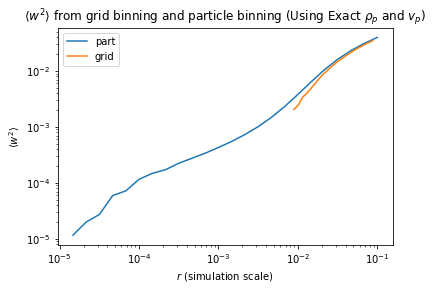

In [201]:
plt.title(r'$\langle w^2\rangle$ from grid binning and particle binning (Using Exact $\rho_p$ and $v_p$)')
plt.ylabel(r'$\langle w^2\rangle$')
plt.xlabel(r'$r$ (simulation scale)')
plot_rel_vel(particleStats,mode='part')
plot_rel_vel(gridStatsNonNan,mode='grid')
plt.legend()

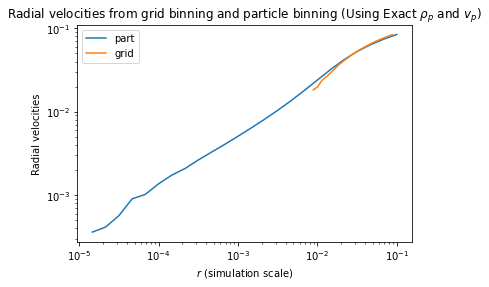

In [202]:
plt.title(r'Radial velocities from grid binning and particle binning (Using Exact $\rho_p$ and $v_p$)')
plt.ylabel(r'Radial velocities')
plt.xlabel(r'$r$ (simulation scale)')
plot_rad_vel(particleStats,mode='part')
plot_rad_vel(gridStatsNoNan)
plt.legend()

In [203]:
np.mean(np.load('./data/TurbPar.out2.00040.hdf5-rhop.npy'))

0.099999875